In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from phik import phik_matrix
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import random

In [2]:
#读取源数据
data = pd.read_excel("../DataSource/result.xlsx")
# 去除 'source ID' 列
data = data.drop('source ID', axis=1)
data_array = data.values

In [3]:
print(data)

     T1548  T1548.002  T1548.004  T1548.001  T1548.003  T1134  T1134.002  \
0        0          0          0          0          0      0          0   
1        0          0          0          0          0      0          0   
2        0          0          0          0          0      0          0   
3        0          0          0          0          0      0          0   
4        0          0          0          0          0      0          0   
..     ...        ...        ...        ...        ...    ...        ...   
125      0          0          0          0          0      0          0   
126      0          0          0          0          0      0          0   
127      0          0          0          0          0      0          0   
128      0          0          0          0          0      0          0   
129      0          0          0          0          0      0          0   

     T1134.003  T1134.004  T1134.005  ...  T1497.002  T1600  T1600.002  \
0            

In [4]:
#预处理

In [5]:
# 计算每列的和，即每个technique_id的使用频率
df = pd.DataFrame(data)

In [6]:
# 计算每列的和，即每个technique_id的使用频率
technique_usage = df.sum()

In [7]:
print(technique_usage)

T1548         0
T1548.002     9
T1548.004     0
T1548.001     0
T1548.003     0
             ..
T1102.002    16
T1102.001     5
T1102.003     1
T1047        26
T1220         3
Length: 594, dtype: int64


In [10]:
# 创建包含technique_id和使用频率的DataFrame
technique_usage_df = pd.DataFrame({'technique_id': technique_usage.index, 'usage_count': technique_usage.values})

In [11]:
print(technique_usage_df)

    technique_id  usage_count
0          T1548            0
1      T1548.002            9
2      T1548.004            0
3      T1548.001            0
4      T1548.003            0
..           ...          ...
589    T1102.002           16
590    T1102.001            5
591    T1102.003            1
592        T1047           26
593        T1220            3

[594 rows x 2 columns]


In [12]:
zero_frequency_technique_list = []
for index, row in technique_usage_df.iterrows():
    technique_id = row['technique_id']
    usage_count = row['usage_count']
    if usage_count == 0:
        zero_frequency_technique_list.append(technique_id)

In [131]:
print(zero_frequency_technique_list)
# 使用set去重并计算不同技术ID的数量
unique_technique_ids = set(zero_frequency_technique_list)
count_unique_technique_ids = len(zero_frequency_technique_list)

# 打印不同技术ID的数量
print(f"不同技术ID的数量：{count_unique_technique_ids}")

['T1548', 'T1548.004', 'T1548.001', 'T1548.003', 'T1134.003', 'T1134.004', 'T1134.005', 'T1583', 'T1583.005', 'T1583.007', 'T1595', 'T1557.003', 'T1020.001', 'T1547', 'T1547.014', 'T1547.002', 'T1547.006', 'T1547.008', 'T1547.015', 'T1547.010', 'T1547.007', 'T1547.005', 'T1547.003', 'T1547.013', 'T1037.002', 'T1037.003', 'T1037.004', 'T1037.005', 'T1185', 'T1612', 'T1580', 'T1538', 'T1526', 'T1619', 'T1059.002', 'T1059.008', 'T1586', 'T1586.003', 'T1554', 'T1584', 'T1584.002', 'T1584.007', 'T1543', 'T1543.001', 'T1543.004', 'T1555.001', 'T1555.002', 'T1132', 'T1132.002', 'T1565', 'T1001', 'T1602', 'T1602.002', 'T1602.001', 'T1622', 'T1491', 'T1587.004', 'T1006', 'T1561', 'T1484', 'T1499.003', 'T1499.004', 'T1499.001', 'T1499.002', 'T1585.003', 'T1546', 'T1546.009', 'T1546.014', 'T1546.016', 'T1546.006', 'T1546.007', 'T1546.002', 'T1546.005', 'T1546.004', 'T1480', 'T1048.001', 'T1011', 'T1011.001', 'T1052', 'T1567.001', 'T1212', 'T1222', 'T1495', 'T1606', 'T1592', 'T1592.003', 'T1592.00

In [113]:
grouped = technique_usage_df.groupby('usage_count')['technique_id'].apply(list).reset_index()
result = grouped.to_dict(orient='records')

# 保存为 JSON 文件
with open('frequency_id.json', 'w') as json_file:
    json.dump(result, json_file)

In [ ]:
# 数据清晰

In [13]:
# 假设zero_frequency_technique_list包含要删除的技术ID
columns_to_remove = zero_frequency_technique_list

# 使用drop方法删除指定的列
data= data.drop(columns=columns_to_remove)

In [14]:
print(data)

     T1548.002  T1134  T1134.002  T1134.001  T1531  T1087  T1087.004  \
0            0      0          0          0      0      0          0   
1            0      0          0          0      0      0          0   
2            0      0          0          0      0      0          0   
3            0      0          0          0      0      0          0   
4            0      0          0          0      0      0          0   
..         ...    ...        ...        ...    ...    ...        ...   
125          0      0          0          0      0      0          0   
126          0      0          0          0      0      0          0   
127          0      0          0          0      0      0          0   
128          0      0          0          0      0      0          0   
129          0      0          0          0      0      0          0   

     T1087.002  T1087.003  T1087.001  ...  T1125  T1497  T1497.001  T1497.002  \
0            0          0          0  ...      0      

In [15]:
# 将DataFrame转换为NumPy数组
data_array = data.values

# 定义每个批次的大小
batch_size = 75

# 计算距离矩阵的维度
num_samples = data_array.shape[0]

# 初始化一个空的距离矩阵
distance_matrix = np.zeros((num_samples, num_samples))

### jacard距离核心代码

In [ ]:
# 分批计算距离矩阵
for i in range(0, num_samples, batch_size):
    start_idx = i
    end_idx = min(i + batch_size, num_samples)
    
    # 计算当前批次内样本之间的Jaccard距离
    batch_distance = pairwise_distances(data_array[start_idx:end_idx], metric='jaccard')
    
    # 将当前批次内的距离矩阵填充到整体距离矩阵中
    distance_matrix[start_idx:end_idx, start_idx:end_idx] = batch_distance

# 将Jaccard距离转换为欧氏距离，以便与Ward链接法兼容
euclidean_distance = squareform(distance_matrix)

# 将欧氏距离数组转换成2D数组
euclidean_distance = euclidean_distance.reshape(-1, 1)

# 使用Ward链接法进行聚类
n_clusters = 16
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(euclidean_distance)

#### phi系数核心代码

In [16]:
# 计算整个样本之间的Phi系数矩阵（相似性矩阵）
full_distance_matrix = phik_matrix(data)

# 使用层次聚类进行聚类
linkage_matrix = linkage(full_distance_matrix, method='ward')

interval columns not set, guessing: ['T1548.002', 'T1134', 'T1134.002', 'T1134.001', 'T1531', 'T1087', 'T1087.004', 'T1087.002', 'T1087.003', 'T1087.001', 'T1098', 'T1098.001', 'T1098.003', 'T1098.002', 'T1098.005', 'T1098.004', 'T1583.002', 'T1583.001', 'T1583.004', 'T1583.003', 'T1583.006', 'T1595.001', 'T1595.002', 'T1595.003', 'T1557', 'T1557.002', 'T1557.001', 'T1071', 'T1071.004', 'T1071.002', 'T1071.003', 'T1071.001', 'T1010', 'T1560', 'T1560.003', 'T1560.002', 'T1560.001', 'T1123', 'T1119', 'T1020', 'T1197', 'T1547.012', 'T1547.001', 'T1547.009', 'T1547.004', 'T1037', 'T1037.001', 'T1217', 'T1176', 'T1110', 'T1110.004', 'T1110.002', 'T1110.001', 'T1110.003', 'T1115', 'T1059', 'T1059.007', 'T1059.001', 'T1059.006', 'T1059.004', 'T1059.005', 'T1059.003', 'T1092', 'T1586.002', 'T1586.001', 'T1584.005', 'T1584.001', 'T1584.004', 'T1584.003', 'T1584.006', 'T1609', 'T1613', 'T1136', 'T1136.003', 'T1136.002', 'T1136.001', 'T1543.002', 'T1543.003', 'T1555', 'T1555.003', 'T1555.005', 'T

In [17]:
print(full_distance_matrix)

           T1548.002     T1134  T1134.002  T1134.001  T1531     T1087  \
T1548.002   1.000000  0.000000   0.000000        0.0    0.0  0.189583   
T1134       0.000000  1.000000   0.000000        0.0    0.0  0.000000   
T1134.002   0.000000  0.000000   1.000000        0.0    0.0  0.000000   
T1134.001   0.000000  0.000000   0.000000        1.0    0.0  0.000000   
T1531       0.000000  0.000000   0.000000        0.0    1.0  0.000000   
...              ...       ...        ...        ...    ...       ...   
T1102.002   0.147393  0.000000   0.342704        0.0    0.0  0.078949   
T1102.001   0.248513  0.000000   0.000000        0.0    0.0  0.000000   
T1102.003   0.000000  0.000000   0.000000        0.0    0.0  0.000000   
T1047       0.148165  0.230978   0.000000        0.0    0.0  0.000000   
T1220       0.000000  0.000000   0.260797        0.0    0.0  0.000000   

           T1087.004  T1087.002  T1087.003  T1087.001  ...  T1125  T1497  \
T1548.002   0.189583   0.147393   0.000000     

In [18]:
# 获取包含所有技术索引名称的列表
all_tech_names = full_distance_matrix.index.tolist()

print("所有技术索引名称的列表：")
print(all_tech_names)

所有技术索引名称的列表：
['T1548.002', 'T1134', 'T1134.002', 'T1134.001', 'T1531', 'T1087', 'T1087.004', 'T1087.002', 'T1087.003', 'T1087.001', 'T1098', 'T1098.001', 'T1098.003', 'T1098.002', 'T1098.005', 'T1098.004', 'T1583.002', 'T1583.001', 'T1583.004', 'T1583.003', 'T1583.006', 'T1595.001', 'T1595.002', 'T1595.003', 'T1557', 'T1557.002', 'T1557.001', 'T1071', 'T1071.004', 'T1071.002', 'T1071.003', 'T1071.001', 'T1010', 'T1560', 'T1560.003', 'T1560.002', 'T1560.001', 'T1123', 'T1119', 'T1020', 'T1197', 'T1547.012', 'T1547.001', 'T1547.009', 'T1547.004', 'T1037', 'T1037.001', 'T1217', 'T1176', 'T1110', 'T1110.004', 'T1110.002', 'T1110.001', 'T1110.003', 'T1115', 'T1059', 'T1059.007', 'T1059.001', 'T1059.006', 'T1059.004', 'T1059.005', 'T1059.003', 'T1092', 'T1586.002', 'T1586.001', 'T1584.005', 'T1584.001', 'T1584.004', 'T1584.003', 'T1584.006', 'T1609', 'T1613', 'T1136', 'T1136.003', 'T1136.002', 'T1136.001', 'T1543.002', 'T1543.003', 'T1555', 'T1555.003', 'T1555.005', 'T1555.004', 'T1485', 'T1

[[1.20000000e+01 7.30000000e+01 1.12993975e-01 2.00000000e+00]
 [1.43000000e+02 3.66000000e+02 1.12993975e-01 2.00000000e+00]
 [3.50000000e+01 3.22000000e+02 1.12993975e-01 2.00000000e+00]
 ...
 [7.65000000e+02 7.69000000e+02 1.48319509e+01 1.05000000e+02]
 [7.71000000e+02 7.72000000e+02 1.80476224e+01 3.38000000e+02]
 [7.67000000e+02 7.73000000e+02 2.20086207e+01 3.88000000e+02]]


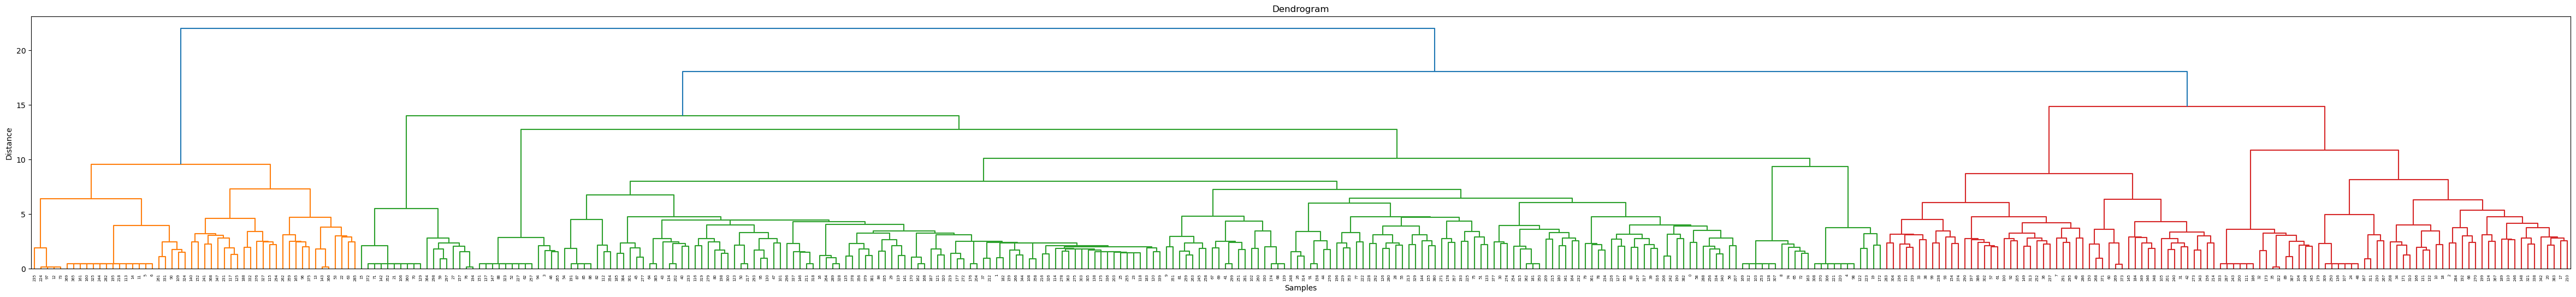

In [19]:
print(linkage_matrix)
# 绘制树状图（树状图可以帮助你选择合适的聚类数量）
plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix,orientation='top')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

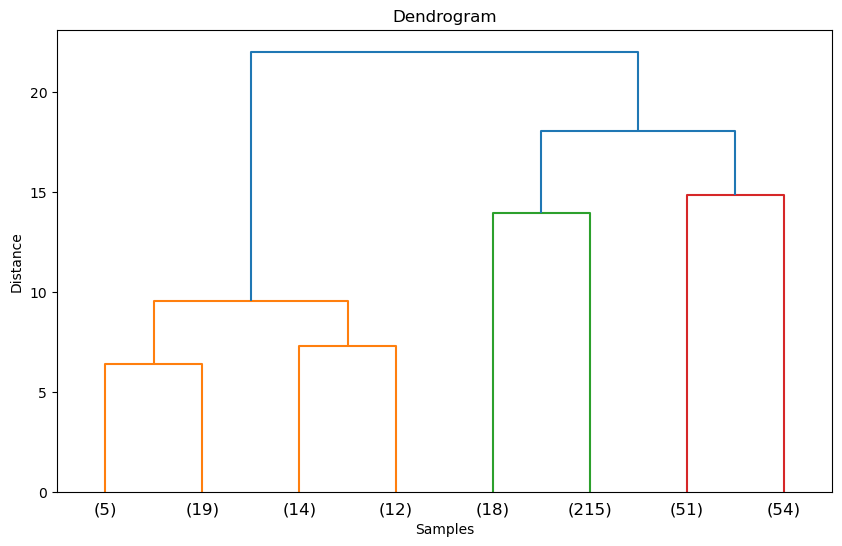

In [21]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=2)['ivl']
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [22]:
from scipy.cluster.hierarchy import fcluster

# 设置截断高度（根据你的需求选择合适的值）
cutoff = 4.0  # 举例，你可以根据实际情况调整 学习到了46个不同的聚类标签。

# 使用fcluster函数进行聚类
cluster_result = fcluster(linkage_matrix, cutoff, criterion='distance')

# 打印聚类结果
print(cluster_result)

[28 17 43  9 30  2  2 35 29 18 42  2  1  6  2  7 16 46 42 30 46  7  6 17
 40 17 21  8 23 17 26 38 39 31 42 39 34 17 31 28 13 19 38 13 21 12  9 14
 40 35 14 25  9  6 10 23 28 33 28  8 36 33  9  6 13 29 43 19 20 19  7  7
 29  1 29 25  8 22 27 27 14 18 11 28 17 10 10 10  9 39  2 21 34 32  9 14
  5  1 30 32 34 14 20 29 39 38  7 40 17  2 45 39 11  2 17  4 14  3 17 17
 17 17 30 14 44  3 23 28 29  7 14 42 42 25 13 17 40  9 17 20  3 17  7  6
 23 37 15  9 46 34 36  9  3 31 32 23 38  8 21 17  2  2 17 29 26  5 42 41
 17 29 17 42 30 39 20 17 17 17 24 40 26 26 17 17 37 12 39 17  4 45 28 10
 43 25  8  2 22 33 14 44 39 38 13 17 17 34 28 28 42 26 46 15 17 23 38 26
 17 14  2 17 30 30 22 30  1 25 28  9 23 22 41  3 26 13 27  1 31 34 32 31
 38  3 28 39  2 18 45 28 21 39 40 19 34 29 26 17 28  9 18 18 20  2  5 18
 16  9 17 41 36 36 43 24 17 38 26 17 21 12 17 14 23 19  2 31 43  6 35 39
 28 16 33 35 23 14  4 35 15  8  8 19 14 12 33 17 31 17 30 29 30 40 42 41
 29 34 21 26 28 28 15 14 17 46 39  9  2  2 17  4 16

In [23]:
# 创建技术名称到聚类标签的映射字典
tech_to_cluster = {tech: label for tech, label in zip(all_tech_names, cluster_result)}

# 打印每个技术以及其对应的聚类标签
for tech, label in tech_to_cluster.items():
    print(f"技术: {tech}，聚类标签: {label}")

技术: T1548.002，聚类标签: 28
技术: T1134，聚类标签: 17
技术: T1134.002，聚类标签: 43
技术: T1134.001，聚类标签: 9
技术: T1531，聚类标签: 30
技术: T1087，聚类标签: 2
技术: T1087.004，聚类标签: 2
技术: T1087.002，聚类标签: 35
技术: T1087.003，聚类标签: 29
技术: T1087.001，聚类标签: 18
技术: T1098，聚类标签: 42
技术: T1098.001，聚类标签: 2
技术: T1098.003，聚类标签: 1
技术: T1098.002，聚类标签: 6
技术: T1098.005，聚类标签: 2
技术: T1098.004，聚类标签: 7
技术: T1583.002，聚类标签: 16
技术: T1583.001，聚类标签: 46
技术: T1583.004，聚类标签: 42
技术: T1583.003，聚类标签: 30
技术: T1583.006，聚类标签: 46
技术: T1595.001，聚类标签: 7
技术: T1595.002，聚类标签: 6
技术: T1595.003，聚类标签: 17
技术: T1557，聚类标签: 40
技术: T1557.002，聚类标签: 17
技术: T1557.001，聚类标签: 21
技术: T1071，聚类标签: 8
技术: T1071.004，聚类标签: 23
技术: T1071.002，聚类标签: 17
技术: T1071.003，聚类标签: 26
技术: T1071.001，聚类标签: 38
技术: T1010，聚类标签: 39
技术: T1560，聚类标签: 31
技术: T1560.003，聚类标签: 42
技术: T1560.002，聚类标签: 39
技术: T1560.001，聚类标签: 34
技术: T1123，聚类标签: 17
技术: T1119，聚类标签: 31
技术: T1020，聚类标签: 28
技术: T1197，聚类标签: 13
技术: T1547.012，聚类标签: 19
技术: T1547.001，聚类标签: 38
技术: T1547.009，聚类标签: 13
技术: T1547.004，聚类标签: 21
技术: T1037，聚类标签: 12
技术: T

### 将结果保存为json格式

In [25]:
import json

# 创建一个空的字典来存储数据
data = {}

# 遍历每个技术和对应的聚类标签，将其添加到字典中
for tech, label in tech_to_cluster.items():
    label_str = str(label)  # 将聚类标签转换为字符串
    if label_str not in data:
        data[label_str] = []
    data[label_str].append(tech)

# 将数据保存为 JSON 文件
with open('cluster_data_pre0_cutoff4.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

#### 可视化结果

['235',
 '224',
 '97',
 '12',
 '73',
 '369',
 '365',
 '161',
 '160',
 '325',
 '244',
 '282',
 '195',
 '218',
 '113',
 '14',
 '11',
 '5',
 '6',
 '261',
 '331',
 '90',
 '109',
 '324',
 '140',
 '152',
 '241',
 '368',
 '347',
 '231',
 '117',
 '125',
 '188',
 '332',
 '376',
 '327',
 '115',
 '294',
 '262',
 '359',
 '165',
 '96',
 '375',
 '13',
 '143',
 '366',
 '53',
 '22',
 '63',
 '285',
 '15',
 '142',
 '106',
 '129',
 '71',
 '372',
 '21',
 '352',
 '70',
 '360',
 '364',
 '298',
 '59',
 '297',
 '27',
 '157',
 '76',
 '194',
 '151',
 '137',
 '147',
 '88',
 '323',
 '52',
 '227',
 '62',
 '257',
 '94',
 '3',
 '46',
 '265',
 '54',
 '191',
 '87',
 '85',
 '86',
 '82',
 '112',
 '354',
 '185',
 '384',
 '301',
 '45',
 '277',
 '64',
 '385',
 '43',
 '134',
 '202',
 '40',
 '233',
 '116',
 '319',
 '279',
 '80',
 '198',
 '300',
 '123',
 '50',
 '217',
 '293',
 '95',
 '130',
 '47',
 '101',
 '296',
 '337',
 '146',
 '211',
 '318',
 '16',
 '264',
 '289',
 '328',
 '135',
 '378',
 '356',
 '379',
 '381',
 '84',
 '33

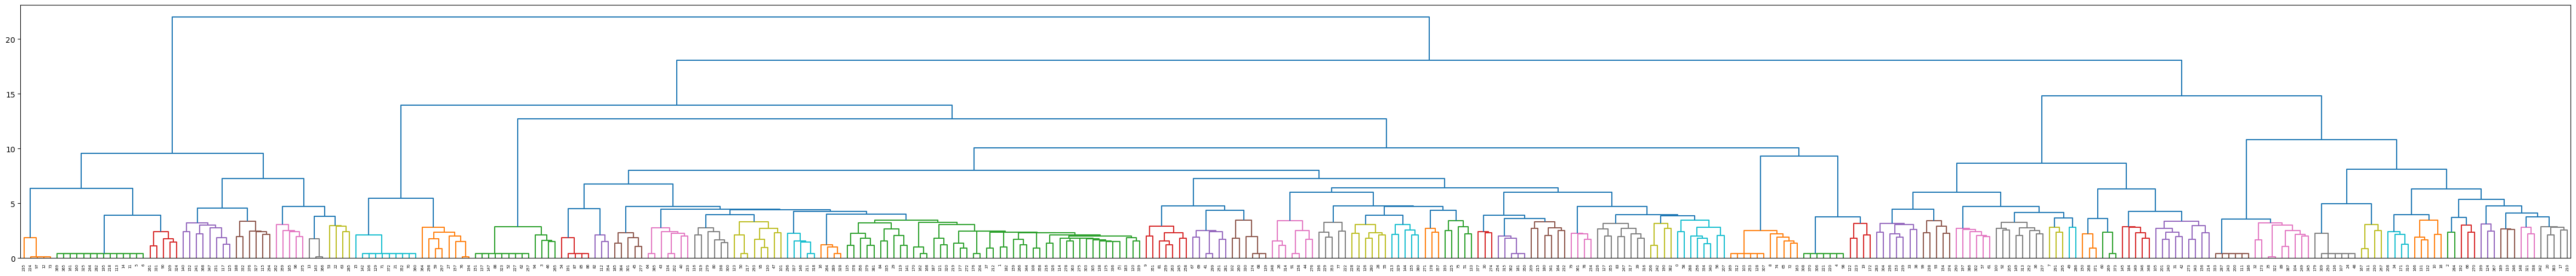

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 读取JSON数据
with open('cluster_data.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix, truncate_mode='level', color_threshold=3.5)['ivl']

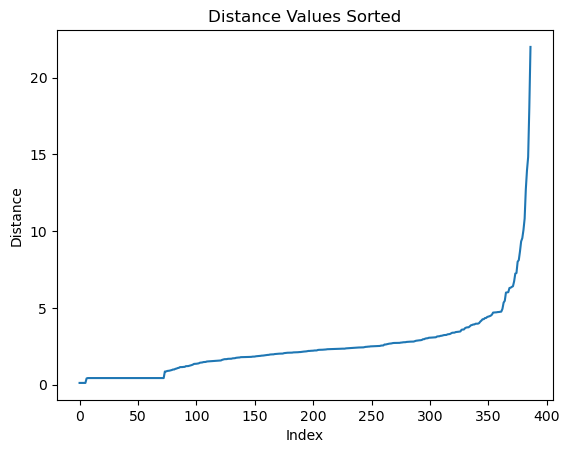

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# 排序连接矩阵
sorted_distances = np.sort(linkage_matrix[:, 2])

# 绘制距离值与索引的折线图
plt.plot(sorted_distances)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Distance Values Sorted')
plt.show()

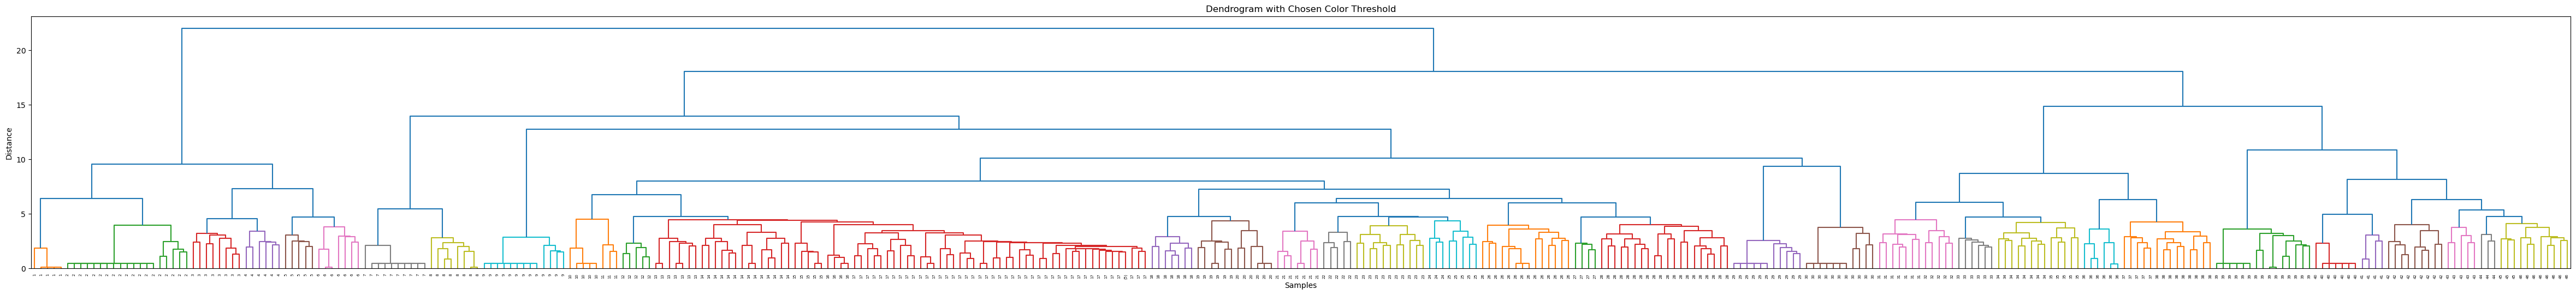

In [26]:
# 你可以选择不同的方法来计算color_threshold，如平均值、中位数等
chosen_threshold = 4.5

# 绘制谱系图
plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix, truncate_mode='level', color_threshold=chosen_threshold, labels=cluster_result)
plt.title('Dendrogram with Chosen Color Threshold')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [27]:
dendrogram?

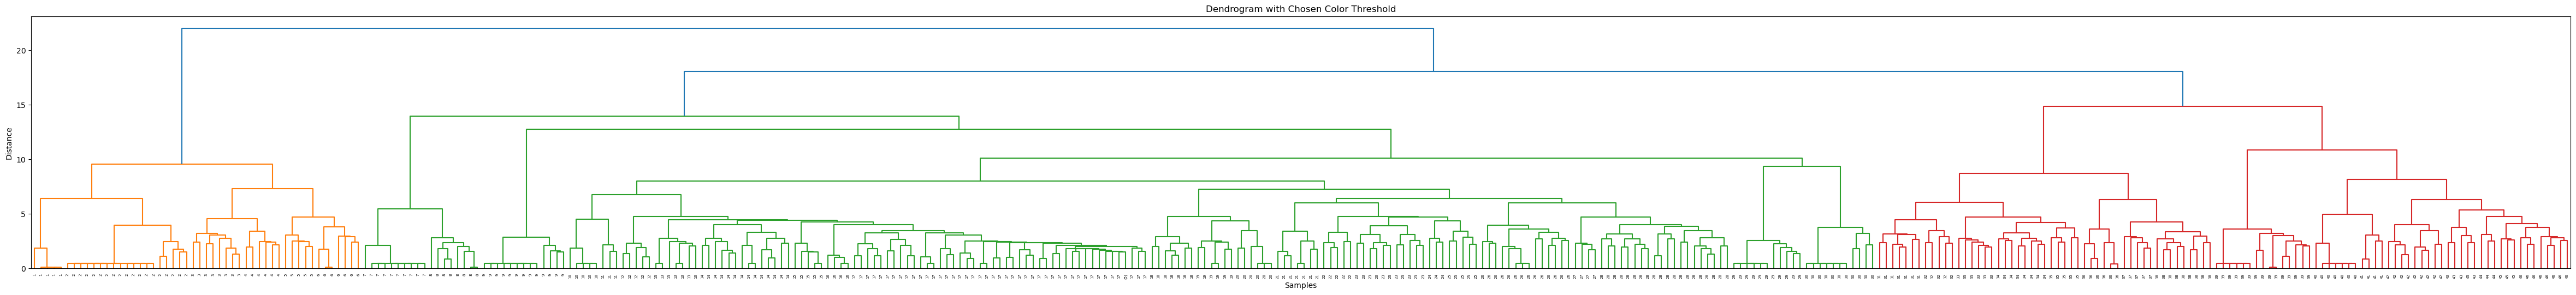

In [30]:
# 你可以选择不同的方法来计算color_threshold，如平均值、中位数等
chosen_threshold = 4.5

# 绘制谱系图
plt.figure(figsize=(60, 6))
dendrogram(linkage_matrix, truncate_mode='level', labels=cluster_result)
plt.title('Dendrogram with Chosen Color Threshold')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()